<h1><center>
    ECE 438 - Laboratory 5b<br/>
    Digital Filter Design (Week 2)<br/>
    <small>Last updated on February 20, 2022</small>
</center></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd
from helper import DTFT, hanning, hamming, blackman, kaiser, firpmord
from scipy import signal, optimize

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (12, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h2 style="color:salmon;"><left>1. Introduction</left></h2>

This is the second part of a two week laboratory in digital filter design. The first week of the laboratory covered some basic examples of FIR and IIR filters, and then introduced the concepts of filter design. In this week we will cover more systematic methods of designing
both FIR and IIR filters.

<h2 style="color:salmon;"><left>2. Filter Design Using Standard Windows</left></h2>

We can generalize the idea of truncation by using different windowing functions to truncate an ideal filter’s impulse response. Note that by simply truncating the ideal filter’s impulse response, we are actually multiplying (or “windowing”) the impulse response by a shifted $rect()$ function. This particular type of window is called a *rectangular* window. In general, the impulse reponse $h[n]$ of the designed filter is related to the impulse response $h_\text{ideal}[n]$ of the ideal filter by the relation

\begin{equation}
    h[n]=w[n]h_\text{ideal}[n]\tag{1}
\end{equation}

where $w[n]$ is an $N$-point window. We assume that

\begin{equation}
        h_\text{ideal}[n] = \frac{\omega_{c}}{\pi}\text{sinc}(\frac{\omega_{c}}{\pi}(n-\frac{N-1}{2}))\tag{2}
\end{equation}

where $\omega_c$ is the cutoff frequency and $N$ is the desired window length.

The rectangular window is defined as

\begin{align}
    w[n]=\begin{cases}
        1&n=0,1,\dots,N-1\\
        0&=\text{otherwise}
        \end{cases}
\end{align}

The DTFT of w[n] for $N=21$ is shown in Fig. 1. The rectangular window is usually not preferred because it leads to the large stopband and passband ripple as shown in Fig. 2.

<figure>
    <img src="imgs/figure1.png" style="width:60%">
    <em><center>Figure 1: DTFT of a rectangular window of length 21.</center></em>
</figure>

<figure>
    <img src="imgs/figure2.png" style="width:60%">
    <em><center>Figure 2: Frequency response of low-pass filter, designed using the truncation method.</center></em>
</figure>

More desirable frequency characteristics can be obtained by making a better selection for the window, $w[n]$. In fact, a variety of raised cosine windows are widely used for this purpose. Some popular windows are listed below.

1. Hanning window:

\begin{align}
    w[n]=\begin{cases}
    {0.5 - 0.5\cos\frac{2\pi n}{N-1}}&n=0,1,\dots,N-1\\
    0&\text{otherwise}
    \end{cases}
\end{align}

2. Hamming window:

\begin{align}
    w[n]=\begin{cases}
    0.54 - 0.46\cos\frac{2\pi n}{N-1}&n=0,1,\dots,N-1\\
    0&\text{otherwise}
    \end{cases}
\end{align}

3. Blackman window:

\begin{align}
    w[n]=\begin{cases}
    0.42 - 0.5\cos\frac{2\pi n}{N-1} + 0.08\cos\frac{4\pi n}{N-1}&n=0,1,\dots,N-1\\
    0&\text{otherwise}
    \end{cases}
\end{align}

In filter design using different truncation windows, there are two key frequency domain effects that are important to the design: the transition band *roll-off*, and the passband and stopband *ripple* (see Fig. 3 below). There are two corresponding parameters in the spectrum of each type of window that influence these filter parameters. The filter’s roll-off is related to the *width* of center lobe of the window’s magnitude spectrum. The *ripple* is influenced by the ratio of the mainlobe amplitude to the first sidelobe amplitude (or difference if using a dB scale). These two window spectrum parameters are **not** independent, and you should see a trend as you examine the spectra for different windows. The theoretical values for the *mainlobe width* and the *peak-to-sidelobe amplitude* are shown in the table below.

|Window (length $N$)|Mainlobe Width|Peak-to-sidelobe Amplitude(dB)|
|:---:|:---:|:---:|
|Rectangular|$4\pi/N$|$-13$ dB|
|Hanning|$8\pi/N$|$-32$ dB|
|Hamming|$8\pi/N$|$-43$ dB|
|Blackman|$12\pi/N$|$-58$ dB|

<h3 style="color:red;"><left>Exercise 2</left></h3>

**1. Plot the rectangular window function of length $21$.**

In [3]:
# insert your code here


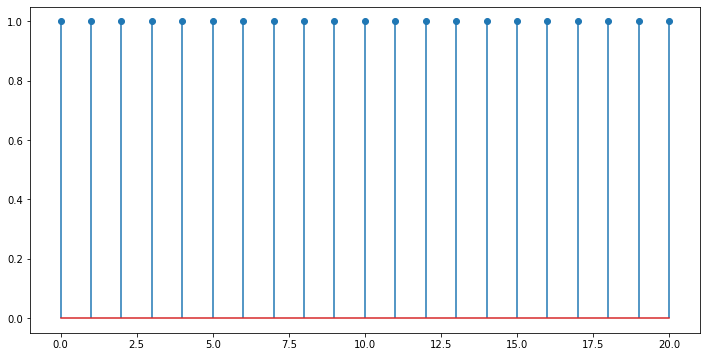

In [4]:
N = 21
def rectangular(N):
    n = np.arange(N)
    return (n >= 0).astype(float) * (n < N).astype(float)

h1 = rectangular(N)
plt.stem(h1)
plt.show()

**2. Plot the Hanning window function of length $21$.**

**Note**: you may use the function `h = hanning(N)` provided in `helper.py`.

In [5]:
# insert your code here


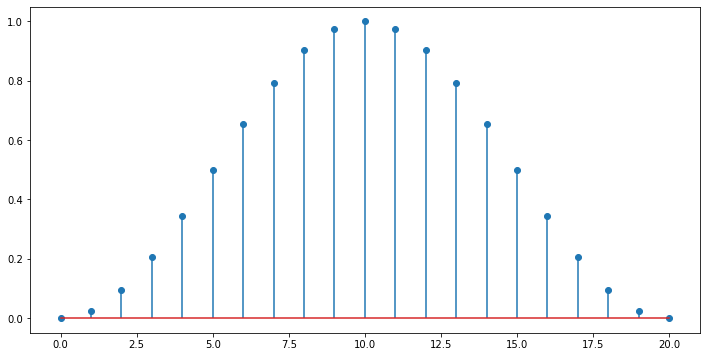

In [6]:
N = 21
n = np.arange(N)

h2 = hanning(N)
plt.stem(n, h2)
plt.show()

**3. Plot the Hamming window function of length $21$.**

**Note**: you may use the function `h = hamming(N)` provided in `helper.py`.

In [7]:
# insert your code here


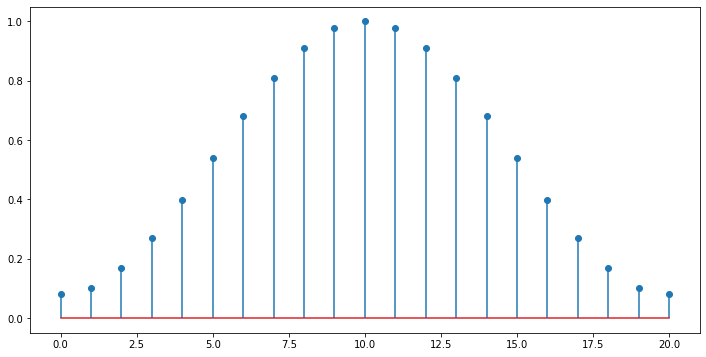

In [8]:
N = 21
n = np.arange(N)

h3 = hamming(N)
plt.stem(n, h3)
plt.show()

**4. Plot the Blackman window function of length $21$.**

**Note**: you may use the function `h = blackman(N)` provided in `helper.py`.

In [9]:
# insert your code here


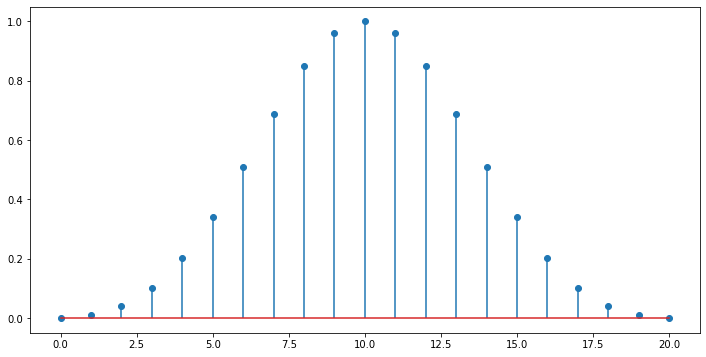

In [10]:
N = 21
n = np.arange(N)

h4 = blackman(N)
plt.stem(n, h4)
plt.show()

---

In Q9, we are going to make some measurements in the plots to be generated in Q5, Q6, Q7, Q8, so we temporarily make the plots interactive by running the following cell block. **Plot just one figure in each cell block and make sure you add the command `plt.figure()` before calling `plt.plot()`.**

In [11]:
# temporarily make the plot interactive
%matplotlib notebook
# specify the size of the plot
plt.rcParams['figure.figsize'] = (12, 6)

**5. Compute and plot the DTFT magnitude of the rectangular window function. Plot the magnitude on a decibel scale (i.e., plot $20\log_{10}|W(e^{j\omega})|$). Also, use at least 512 sample points in computing the DTFT.**

**Hint:** Use the function ```DTFT(window, 512)``` to compute the DTFT.

In [12]:
# insert your code here


<IPython.core.display.Javascript object>


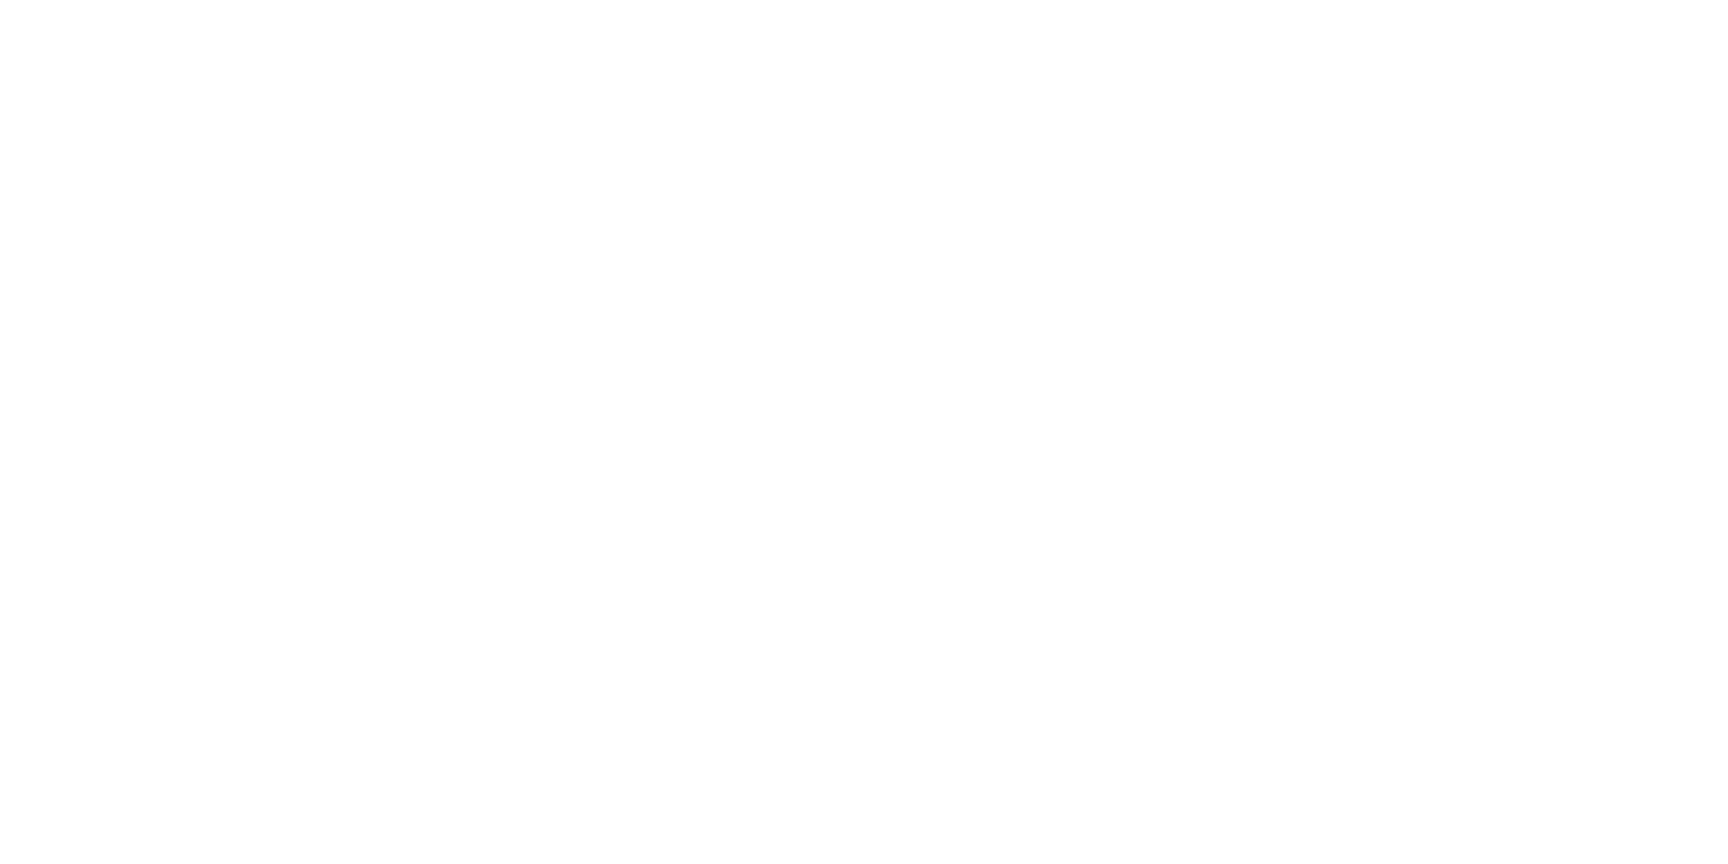

In [13]:
H1, w1 = DTFT(h1, 512)
plt.figure()
plt.plot(w1, 20 * np.log10(np.abs(H1)))
plt.show()

**6. Compute and plot the DTFT magnitude of the Hanning window function. Plot the magnitude on a decibel scale (i.e., plot $20\log_{10}|W(e^{j\omega})|$). Also, use at least 512 sample points in computing the DTFT.**

**Hint:** Use the function ```DTFT(window, 512)``` to compute the DTFT.

In [14]:
# insert your code here


<IPython.core.display.Javascript object>


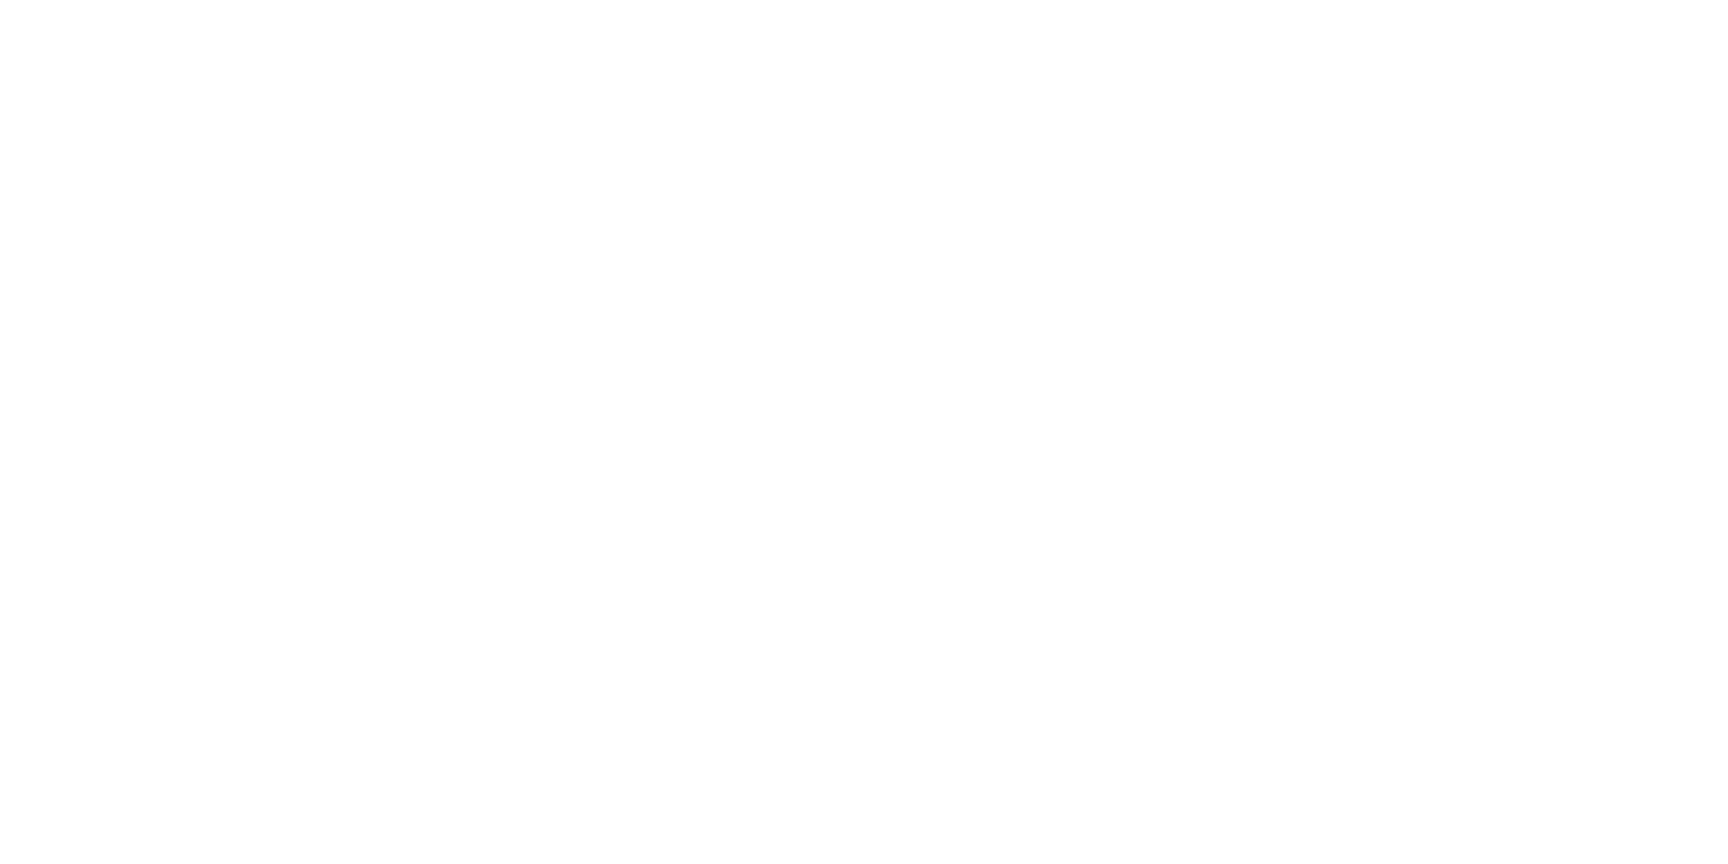

/var/folders/wj/fyy9lt_j0tv7934hq66bkfzh0000gn/T/ipykernel_11849/2665348349.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w2, 20 * np.log10(np.abs(H2)))


In [15]:
H2, w2 = DTFT(h2, 512)
plt.figure()
plt.plot(w2, 20 * np.log10(np.abs(H2)))
plt.show()

**7. Compute and plot the DTFT magnitude of the Hamming window function. Plot the magnitude on a decibel scale (i.e., plot $20\log_{10}|W(e^{j\omega})|$). Also, use at least 512 sample points in computing the DTFT.**

**Hint:** Use the function ```DTFT(window, 512)``` to compute the DTFT.

In [16]:
# insert your code here


<IPython.core.display.Javascript object>


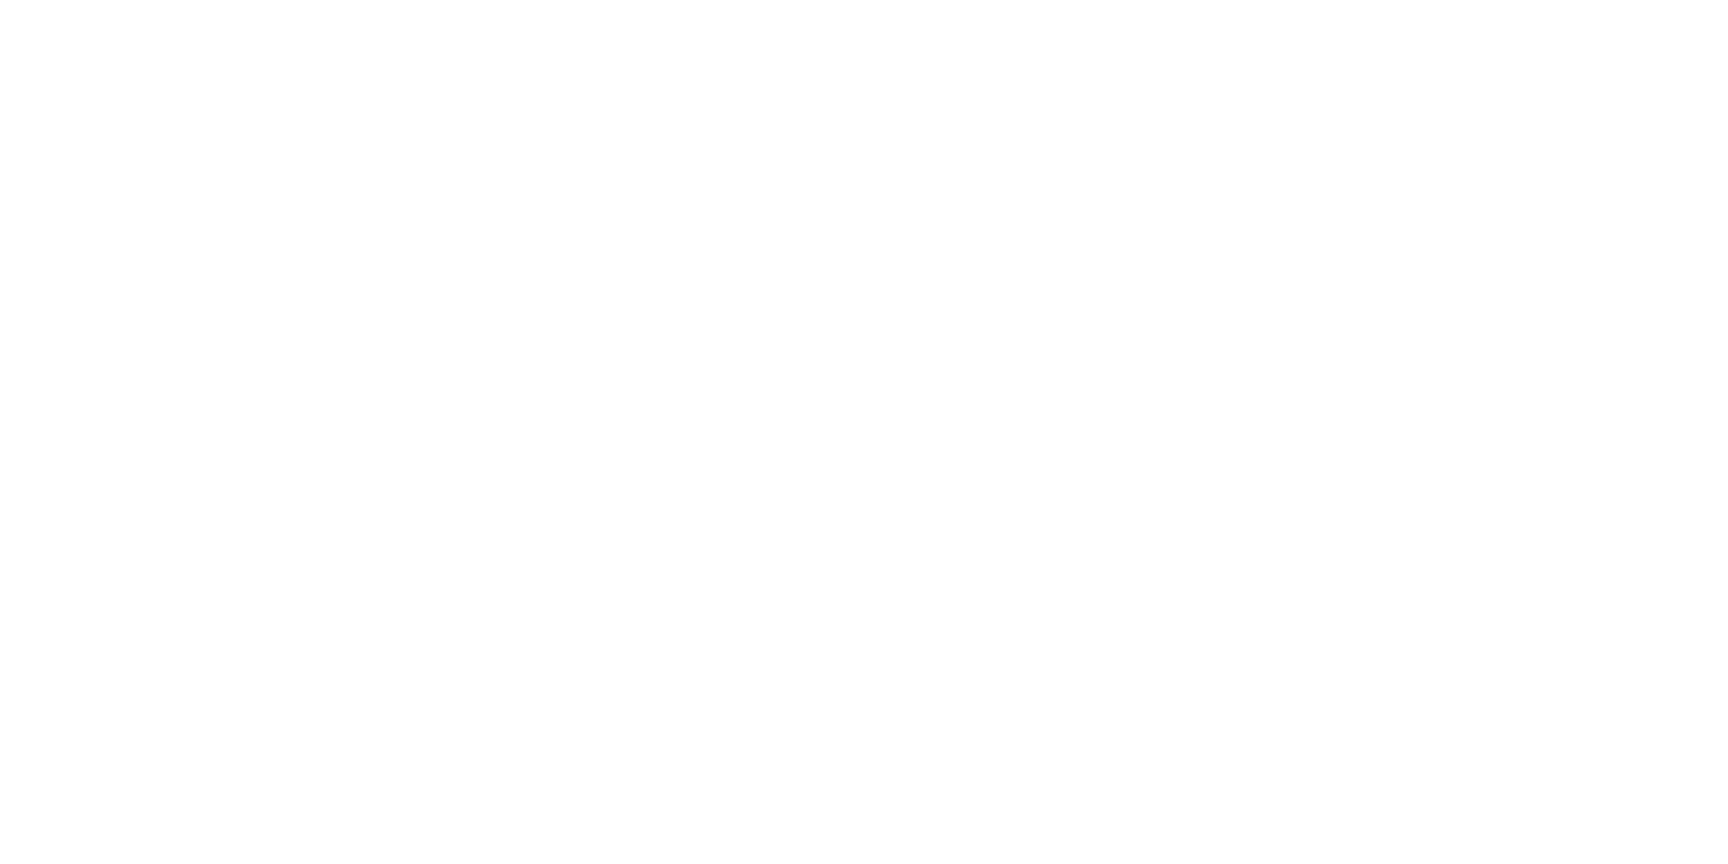

In [17]:
H3, w3 = DTFT(h3, 512)
plt.figure()
plt.plot(w3, 20 * np.log10(np.abs(H3)))
plt.show()

**8. Compute and plot the DTFT magnitude of the Blackman window function. Plot the magnitude on a decibel scale (i.e., plot $20\log_{10}|W(e^{j\omega})|$). Also, use at least 512 sample points in computing the DTFT.**

**Hint:** Use the function ```DTFT(window, 512)``` to compute the DTFT.

In [18]:
# insert your code here


<IPython.core.display.Javascript object>


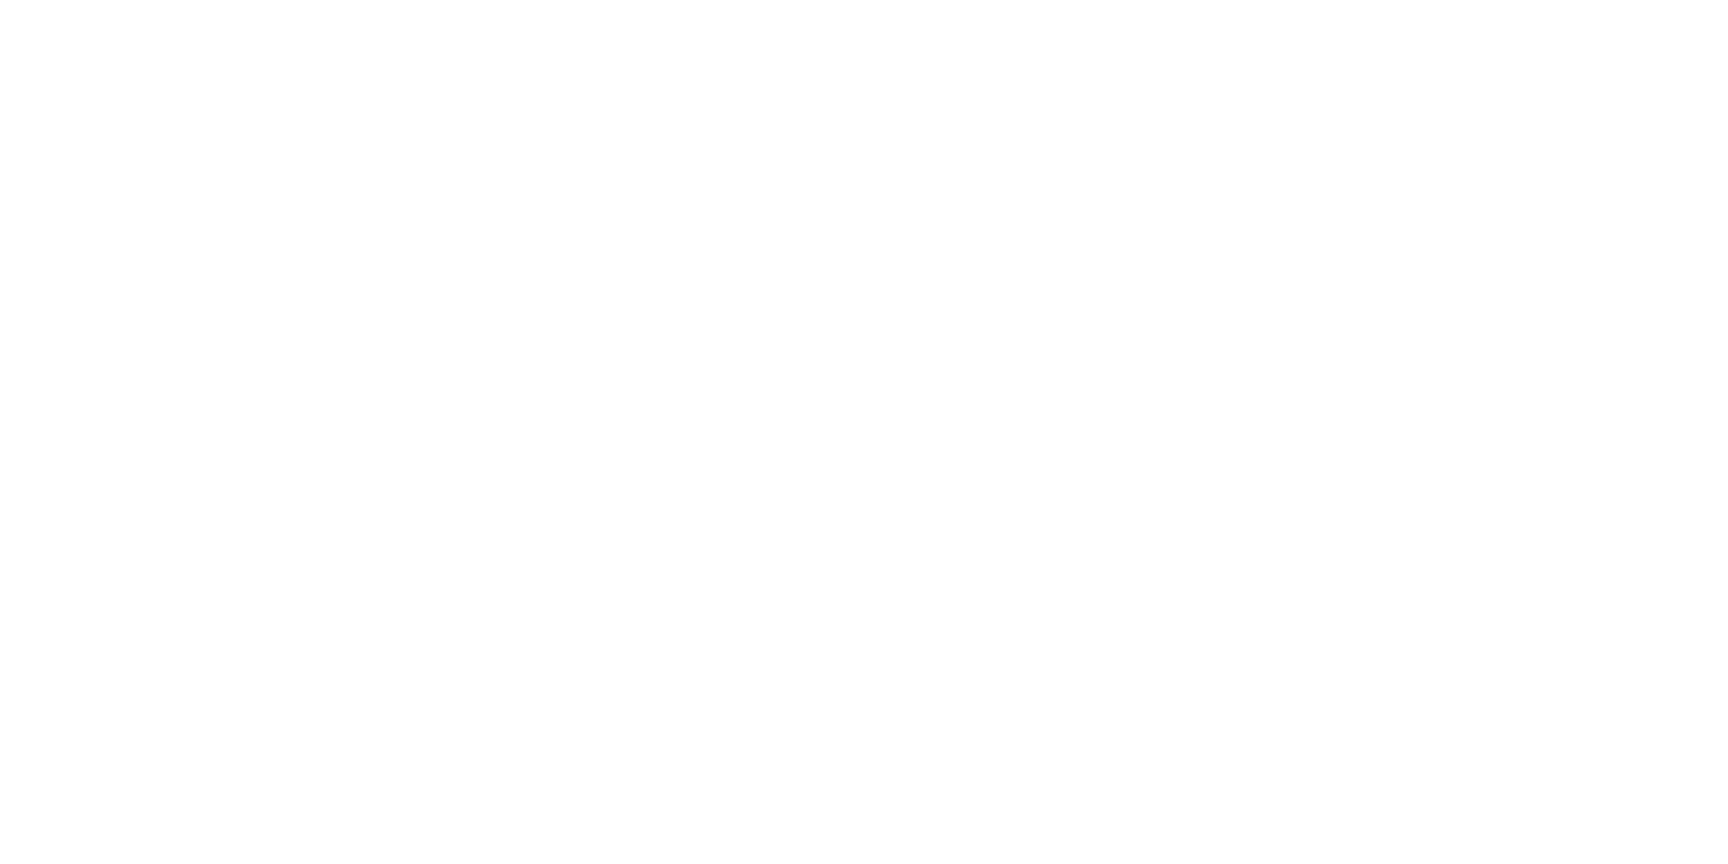

/var/folders/wj/fyy9lt_j0tv7934hq66bkfzh0000gn/T/ipykernel_11849/2513542580.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w4, 20 * np.log10(np.abs(H4)))


In [19]:
H4, w4 = DTFT(h4, 512)
plt.figure()
plt.plot(w4, 20 * np.log10(np.abs(H4)))
plt.show()

**9. Measure the null-to-null mainlobe width (in rad/sample) and the peak-to-sidelobe amplitude (in dB) from the logarithmic magnitude response plot for each window type. Fill in the table below.**

|Window (length $N$)|Mainlobe Width (theoretical)|Mainlobe Width (experimental)|Peak-to-sidelobe Amplitude (dB) (theoretical)|Peak-to-sidelobe Amplitude (dB) (experimental)|
|:---:|:---:|:---:|:---:|:---:|
|Rectangular|4π/21||-13||
|Hanning|8π/21||-32||
|Hamming|8π/21||-43||
|Blackman|12π/21||-58||

|Window (length $N$)|Mainlobe Width (theoretical)|Mainlobe Width (experimental)|Peak-to-sidelobe Amplitude (dB) (theoretical)|Peak-to-sidelobe Amplitude (dB) (experimental)|
|:---:|:---:|:---:|:---:|:---:|
|Rectangular|4π/21|0.588|-13||
|Hanning|8π/21|1.254|-32||
|Hamming|8π/21|1.360|-43||
|Blackman|12π/21|1.882|-58||

---

After you obtain the measurements, run the following cell to make the plot not interactive.

In [20]:
# make the plot not interactive
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (12, 6)

**10. Comment on how close the experimental results matched the ideal values and the relation between the width of the mainlobe and the peak-to-sidelobe amplitude**

insert your answer here

**11. Now use a Hamming window to design a lowpass filter h(n) with a cutoff frequency of $\omega_c$ = 2.0 and length 21. Plot the filter’s impulse response.**

**Note**: You need to use equations (1) and (2) for this design.

In [21]:
# insert your code here


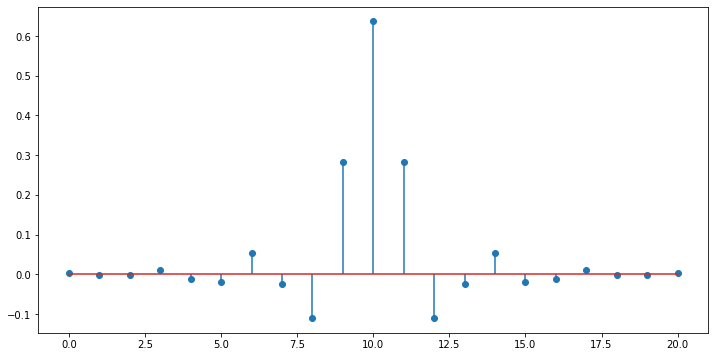

In [22]:
wc = 2.0
N = 21
h_ideal = wc / np.pi * np.sinc(wc / np.pi * (n - (N - 1) / 2))
w = hamming(N)

h = w * h_ideal
plt.figure()
plt.stem(h)
plt.show()

**12. Plot the magnitude of the filter’s DTFT in decibels.**

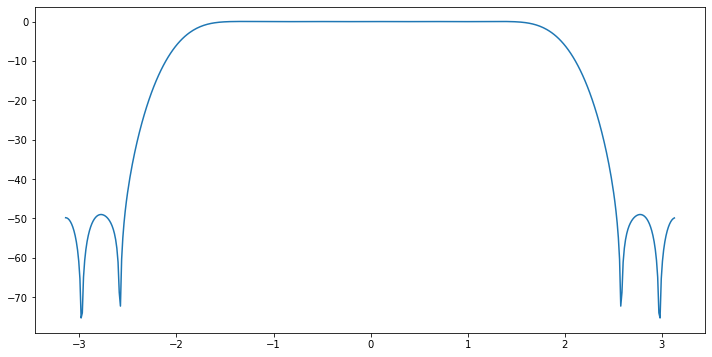

In [23]:
H, w = DTFT(h, 512)
plt.figure()
plt.plot(w, 20 * np.log10(np.abs(H)))
plt.show()

<h2 style="color:salmon;"><left>3. Filter Design Using the Kaiser Window</left></h2>

<figure>
    <img src="imgs/figure3.png" style="width:60%">
    <em><center>Figure 3: Tolerance specifications for the frequency response of a filter.</center></em>
</figure>
          
The standard windows of [Section 2](#2.-Filter-Design-Using-Standard-Windows) are an improvement over simple truncation, but these windows still do not allow for arbitrary choices of transition bandwidth and ripple. In
1964, James Kaiser derived a family of near-optimal windows that can be used to design filters which meet or exceed any filter specification. The Kaiser window depends on two parameters: the window length $N$, and a parameter $\beta$ which controls the shape of the window. Large values of $\beta$ reduce the window sidelobes and therefore result in reduced passband and stopband ripple. The only restriction in the Kaiser filter design method is that the passband and stopband ripple must be equal in magnitude. Therefore, the Kaiser filter must be designed to meet the smaller of the two ripple constraints:

\begin{equation}
    \delta=\min\{\delta_p, \delta_s\}
\end{equation}

The Kaiser window function of length $N$ is given by

\begin{equation}
    w[n]=\begin{cases}
    {\frac{I_0\left(\beta\frac{\sqrt{n(N-1-n)}}{N-1}\right)}{I_0(\beta)}}&n=0,1,\dots,N-1\\
    0&\text{otherwise}
    \end{cases}
\end{equation}

where $I_0(\cdot)$ is the zero’th order modified Bessel function of the first kind, $N$ is the length of the window, and $\beta$ is the shape parameter.

Kaiser found that values of $\beta$ and $N$ could be chosen to meet any set of design parameters, $(\delta, \omega_p, \omega_s)$, by defining $A=−20\log_{10}\delta$ and using the following two equations:

\begin{equation}
    \beta=\begin{cases}
    0.1102(A-8.7)&A>50\\
    0.5842(A-21)^{0.4}+0.07886(A-21)&21\leq A\leq50\\
    0.0&A<21
    \end{cases}\tag{3}
\end{equation}

\begin{equation}
    N=\left\lceil{1+\frac{A-8}{2.285(\omega_s-\omega_p)}}\right\rceil\tag{4}
\end{equation}

where $\left\lceil\cdot\right\rceil$ is the *ceiling* function, i.e. $\left\lceil x \right\rceil$ is the smallest integer which is greater than or equal to $x$.

<h3 style="color:red;"><left>Exercise 3.1</left></h3>

To further investigate the Kaiser window, plot the Kaiser windows and their DTFT magnitudes (in dB) for $N = 21$ and the following values of $\beta$:

  * $\beta=0$
  * $\beta=1$
  * $\beta=5$
  
For each case use at least 512 points in the plot of the DTFT.

**Hint:** To create the Kaiser windows, use the command ```kaiser(N, beta)``` where `N` is the length of the filter and `beta` is the shape parameter $\beta$. To insure at least 512 points in the plot use the command `DTFT(window, 512)` when computing the DTFT.

**1. Plot the Kaiser window and the DTFT magnitude (in dB) for $\beta=0$.**

In [24]:
# insert your code here


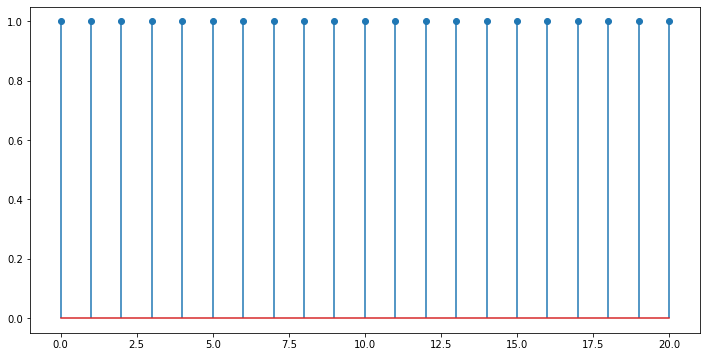

In [25]:
kaiser1 = kaiser(21, 0)
plt.figure()
plt.stem(kaiser1)
plt.show()

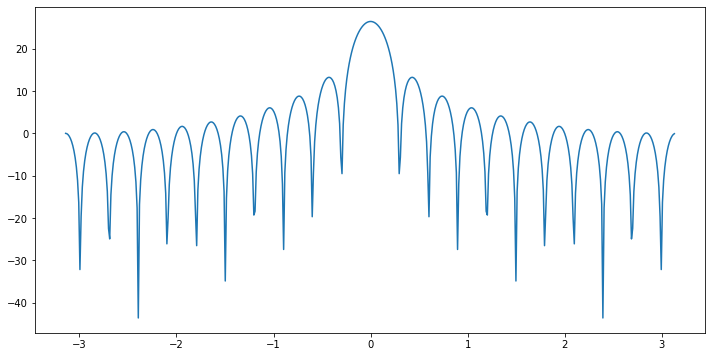

In [26]:
H1, w1 = DTFT(kaiser1, 512)
plt.figure()
plt.plot(w1, 20 * np.log10(np.abs(H1)))
plt.show()

**2. Plot the Kaiser window and the DTFT magnitude (in dB) for $\beta=1$.**

In [27]:
# insert your code here


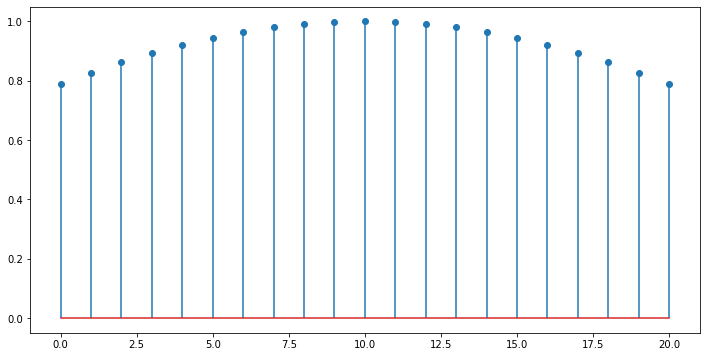

In [28]:
kaiser2 = kaiser(21, 1)
plt.figure()
plt.stem(kaiser2)
plt.show()

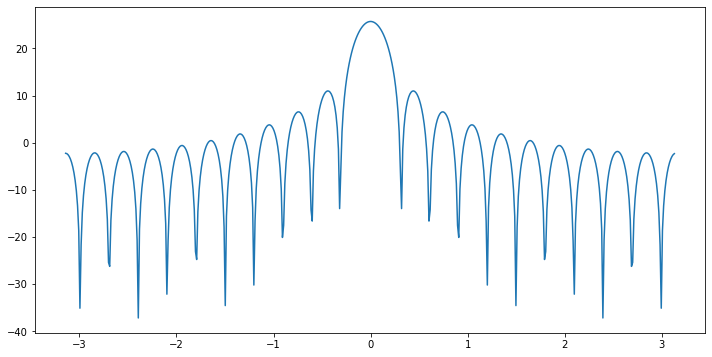

In [29]:
H2, w2 = DTFT(kaiser2, 512)
plt.figure()
plt.plot(w2, 20 * np.log10(np.abs(H2)))
plt.show()

**3. Plot the Kaiser window and the DTFT magnitude (in dB) for $\beta=5$.**

In [30]:
# insert your code here


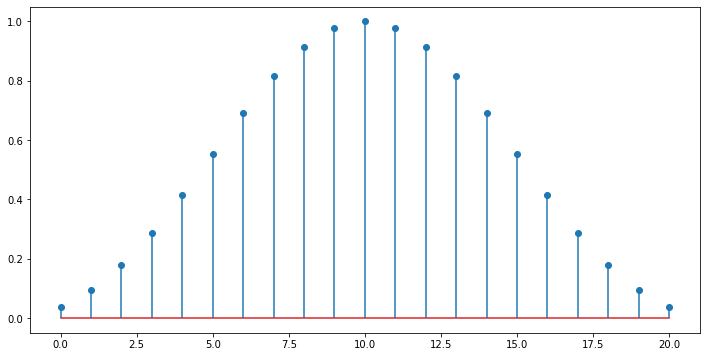

In [31]:
kaiser3 = kaiser(21, 5)
plt.figure()
plt.stem(kaiser3)
plt.show()

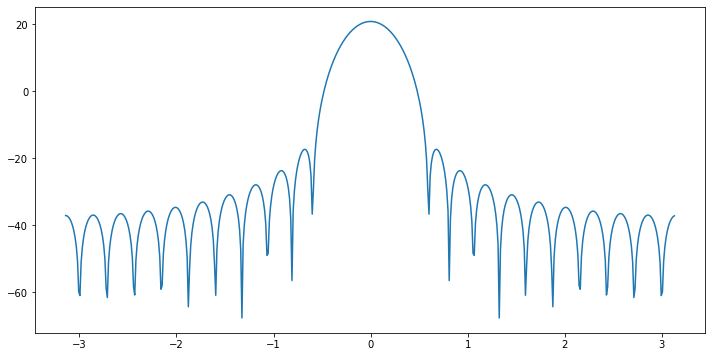

In [32]:
H3, w3 = DTFT(kaiser3, 512)
plt.figure()
plt.plot(w3, 20 * np.log10(np.abs(H3)))
plt.show()

**4. Comment on how the value $\beta$ affects the shape of the window and the sidelobes of the DTFT.**

insert your answer here

<h3 style="color:red;"><left>Exercise 3.2</left></h3>

<figure>
    <img src="imgs/figure4.png" style="width:60%">
    <em><center>Figure 4: DTFT of a section of noisy speech.</center></em>
</figure>

Next we will use a Kaiser window to design a low pass filter, $h[n]$, to remove the noise from the signal in `nspeech2.npy` using equations (1) and (2). To do this, use equations (3) and (4) to compute the values of $\beta$ and $N$ that will yield the following design specifications:

  * $\omega_p = 1.8$
  * $\omega_s = 2.2$
  * $\delta_p = 0.05$
  * $\delta_s = 0.005$

The low pass filter designed with the Kaiser method will automatically have a cut-off frequency centered between $\omega_p$ and $\omega_s$.

\begin{equation}
    \omega_c=\frac{\omega_p+\omega_s}{2}
\end{equation}

**1. Use the kaiser window command to design a low pass filter using the specifications listed above. Print out the values of $\beta$ and $N$.**

In [33]:
# insert your code here


In [34]:
w_p = 1.8
w_s = 2.2
delta_p = 0.05
delta_s = 0.005

delta = min(delta_p, delta_s)
A = -20 * np.log10(delta)
beta = 0
if A > 50:
    beta = 0.1102 * (A - 8.7)
elif 21 <= A and A <= 50:
    beta = 0.5842 * np.power(A - 21, 0.4) + 0.07886 * (A - 21)
N = int(np.ceil(1 + (A - 8) / (2.285 * (w_s - w_p))))
print(f"beta: {beta}\nN: {N}")

beta: 4.090903521438445
N: 43


**2. Print out the value of $\omega_c$.**

In [35]:
# insert your code here


In [36]:
w_c = (w_p + w_s) / 2
print(w_c)

2.0


**3. Plot the magnitude of the DTFT of the designed low pass filter for $|\omega| < \pi$.**

**Note:** Since the ripple is measured on a magnitude scale, DO NOT use a decibel scale on the plot.

In [37]:
# insert your code here


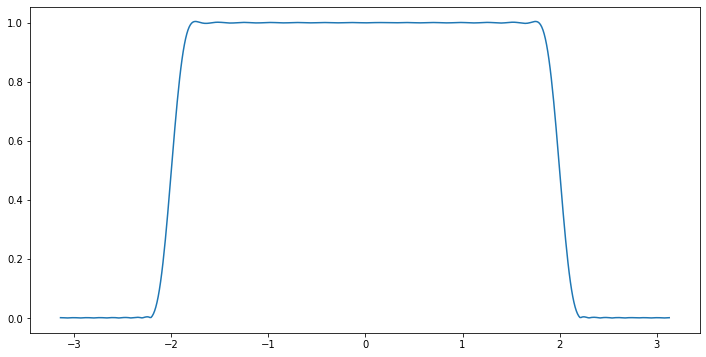

In [38]:
n = np.arange(N)
w = kaiser(N, beta)
h_ideal = w_c / np.pi * np.sinc(w_c / np.pi * (n - (N - 1) / 2))
h = w * h_ideal

H, ws = DTFT(h, 512)
plt.plot(ws, np.abs(H))
plt.show()

**4. Now, plot the magnitude of the DTFT of the designed low pass filter for $|\omega| < \pi$ again, but the plot should show the passband ripple only. Save the plot by calling `plt.savefig("passband.png")` at the end.**

**Hint:** you may use [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html).

In [39]:
# insert your code here


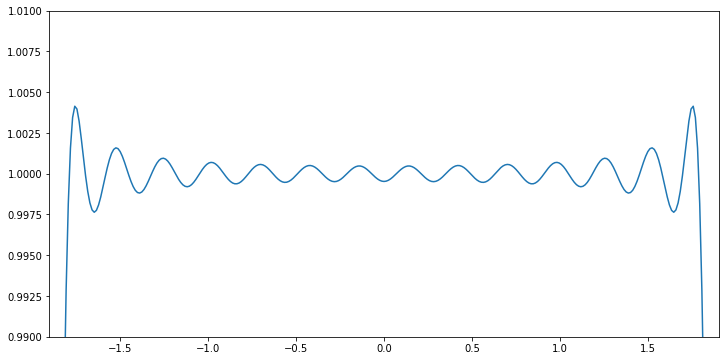

In [40]:
plt.plot(ws, np.abs(H))
plt.xlim([-1.9, 1.9])
plt.ylim([0.99, 1.01])
plt.savefig("passband.png")
plt.show()

**5. Now, plot the magnitude of the DTFT of the designed low pass filter for $|\omega| < \pi$ again, but the plot should show the stopband ripple only. Save the plot by calling `plt.savefig("stopband.png")` at the end.**

**Hint:** you may use [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html).

In [41]:
# insert your code here


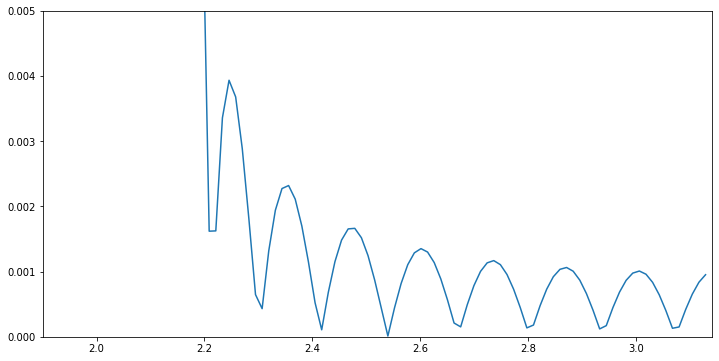

In [42]:
plt.plot(ws, np.abs(H))
plt.xlim([1.9, np.pi])
plt.ylim([0, 0.005])
plt.savefig("stopband.png")
plt.show()

**6. On the saved image `passband.png`, mark $\omega_p$ and $\delta_p$ where appropiate, and attach the marked image here.**

insert your answer here

**7. On the saved image `stopband.png`, mark $\omega_s$ and $\delta_s$ where appropiate, and attach the marked image here.**

insert your answer here

**8. Compute the stopband and passband ripple and display it to three decimal places (do not do this graphically). Do they meet the design specifications?**

**Hint:** Find the value of the DTFT at frequencies corresponding to the passband using the command `H[abs(w) <= 1.8]` where `H` is the DTFT of `h[n]` and `w` is the corresponding vector of frequencies. Then use this vector to compute the passband ripple. Use a similar procedure for the stopband ripple. 

In [43]:
# insert your code here


**9. Load the file ```nspeech2.npy``` using `np.load("nspeech2.npy") and play it using the command ```ipd.Audio(nspeech2, rate=8000)```. Also, note the quality of the speech and background noise.**

In [44]:
# insert your code here


In [45]:
nspeech2 = np.load("nspeech2.npy")
ipd.Audio(nspeech2, rate=8000)

insert your answer here

**10. Apply the filter that you have designed to this signal. Then, compute the DTFT of 400 samples of the filtered signal starting at time `n = 20000`. Plot the magnitude of the DTFT samples in decibels versus frequency in radians for $|\omega<\pi|$.**

In [46]:
# insert your code here


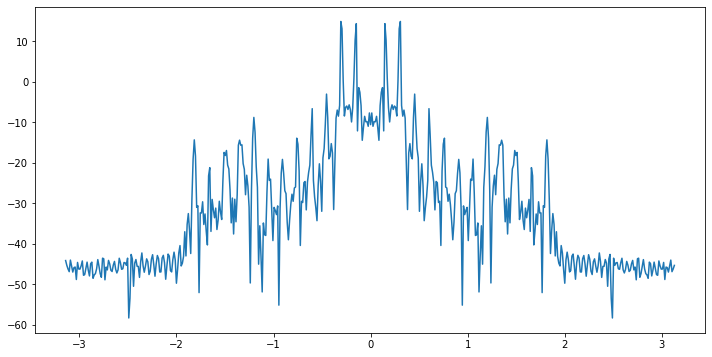

In [47]:
nspeech2_filtered = np.convolve(h, nspeech2)
H, w = DTFT(nspeech2_filtered[20000:20400], 512)
plt.plot(w, 20 * np.log10(np.abs(H)))
plt.show()

**11. Compare this plot with the spectrum of the noisy speech signal shown in Fig. 4. Play the noisy and filtered speech signals and listen to them carefully.**

In [48]:
# insert your code here


**12. Comment on how the frequency content and the audio quality of the filtered signal
have changed after filtering.**

insert your answer here

<h2 style="color:salmon;"><left>4. FIR Filter Design Using Parks-McClellan Algorithm</left></h2>

Kaiser windows are versatile since they allow the design of arbitrary filters which meet specific design constraints. However, filters designed with Kaiser windows still have a number of disadvantages. For example,

  * Kaiser filters are not guaranteed to be the minimum length filter which meets the design constraints.
  * Kaiser filters do not allow passband and stopband ripple to be varied independently.

Minimizing filter length is important because in many applications the length of the filter determines the amount of computation. For example, an FIR filter of length $N$ may be directly implemented in the time domain by evaluating the expression

\begin{equation}
    y[n]=\sum_{n=0}^{N-1}x[n-k]h[k]\tag{5}
\end{equation}

For each output value $y[n]$ this expression requires $N$ multiplies and $N − 1$ additions.

Oftentimes $h[n]$ is a symmetric filter so that $h[n] = h[N − 1 − n]$. If the filter $h[n]$ is symmetric and $N$ is even, then (5) may be more efficiently computed as

\begin{equation}
    y[n]=\sum_{k=0}^{N/2-1}\left(x[n-k]+x[n-N+1+k]\right)h[k]
\end{equation}

This strategy reduces the computation to $N / 2$ multiplies and $N − 1$ adds for any value of $N$. Note that the computational effort is linearly proportional to the length of the filter.

The Kaiser filters do not guarantee the minimum possible filter length. Since the filter has equal passband and stopband ripple, it will usually exceed design requirements in one of the two bands; this results in an unnecessarily long filter. A better design would allow the stopband and passband constraints to be specified separately.

In 1972, Parks and McClellan devised a methodology for designing symmetric filters that minimize filter length for a particular set of design constraints $\{\omega_p, \omega_s, \delta_p, \delta_s\}$. The resulting filters minimize the maximum error between the desired frequency response and the actual frequency response by spreading the approximation error uniformly over each band. The Parks and McClellan algorithm makes use of the Remez exchange algorithm and Chebyshev approximation theory. Such filters that exhibit *equiripple* behavior in both the passband and the stopband, and are sometimes called equiripple filters.

As with Kaiser filters, designing a filter with the Parks and McClellan algorithm is a two step process. First the length (i.e. order) of the filter must be computed based on the design constraints. Then the optimal filter for a specified length can be determined. As with Kaiser windows, the filter length computation is approximate so the resulting filter may exceed or violate the design constraints. This is generally not a problem since the filter can be redesigned for different lengths until the constraints are just met.

The command for computing the approximate filter length is `n, fo, mo, w = firpmord(f, m, ripple, 2 * np.pi)` where the inputs are:
  * `f` - vector containing an even number of band edge frequencies. For a simple low pass filter, `f = [wp, ws]`, where `wp` and `ws` are the passband and stopband frequencies, respectively.
  * `m` - vector containing the ideal filter magnitudes of the filter in each band. For a simple low pass filter `m = [1, 0]`.
  * `ripple` - vector containing the allowed ripple in each band. For a simple low pass filter `ripple = [delta_p, delta_s]`, where `delta_p` and `delta_s` are the passband and stopband ripples, respectively.
  * `2 * np.pi` - value, in radians, that corresponds to the sampling frequency.
  
The outputs of the command are `n`, which is equal to filter length - $1$, and the vectors `fo`, `mo`, and `w` which are intermediate filter parameters.

Once the filter order, `n`, is obtained, the command for designing a Parks-McClellan filter is `b = signal.remez(n + 1, fo, mo, w, fs=2*np.pi)`. The inputs `n`, `fo`, `mo`, and `w` are the corresponding outputs of `firpmord`, and the output `b` is a vector of FIR filter coefficients such that

\begin{equation}
    H(z)=b(1)+b(2)z^{-1}+\cdots+b(n+1)z^{-n}
\end{equation}

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Design a symmetric FIR filter using `firpmord` and ```signal.remez``` to meet the design specifications given in Section 3.**

In [49]:
# insert your code here


In [50]:
n, fo, mo, w = firpmord([w_p, w_s], [1, 0], [delta_p, delta_s], 2 * np.pi)
b = signal.remez(n + 1, fo, mo, w, fs=2*np.pi)

**2. Compute the DTFT of the filter’s response for at least 512 points, and use this result to compute the passband and stopband ripple of the filter that was designed.** 

In [51]:
# insert your code here


**3. Plot the filter's DTFT in dB.**

/var/folders/wj/fyy9lt_j0tv7934hq66bkfzh0000gn/T/ipykernel_11849/447452715.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(H)))


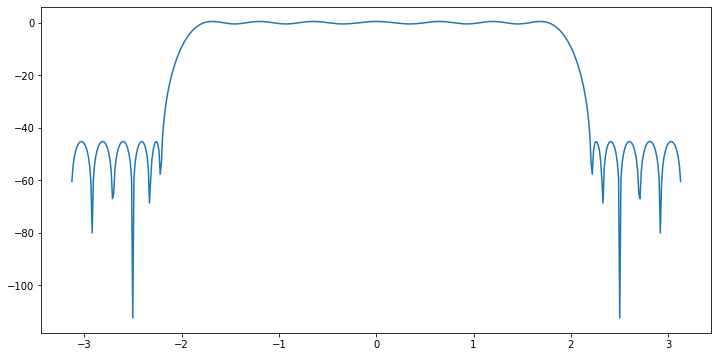

In [52]:
H, w = DTFT(b, 512)
plt.plot(w, 20 * np.log10(np.abs(H)))
plt.show()

**4. How accurate was the filter order computation using `firpmord` and `scipy.remez`? How does the length of this filter compare to the filter designed using a Kaiser window?**

insert your answer here

**5. How does the frequency response of the Parks-McClellan filter compare to the filter designed using the Kaiser window? Comment on the shape of both the passband and stopband.**

insert your answer here

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Use the filter you have designed to remove the noise from the signal nspeech2.npy. Play the noisy and filtered speech signals back using sound and listen to them carefully.**

In [53]:
# noisy speech signal


In [54]:
# filtered speech signal


In [55]:
ipd.Audio(nspeech2, rate=8000)

In [56]:
filtered_nspeech2 = np.convolve(b, nspeech2)
ipd.Audio(filtered_nspeech2, rate=8000)

**2. Comment on how the audio quality of the signal changes after filtering. Also comment on any differences in audio quality between the Parks-McClellan filtered speech and the Kaiser filtered speech.**

insert your answer here

**3. Compute the DTFT of 400 samples of the filtered signal starting at time `n = 20000` (i.e., `[20000:20400]`). Plot the magnitude of the DTFT in decibels versus frequency in radians for $|\omega| < \pi$.**

In [57]:
# insert your code here


**4. Compare this with the spectrum of the noisy speech signal shown in Fig. 4, and also with the magnitude of the DTFT of the Kaiser filtered signal.**

insert your answer here

<h2 style="color:salmon;"><left>5. Design of Discrete-Time IIR Filters Using Numerical Optimization</left></h2>

In this section, we consider the design of discrete-time IIR filters through the direct search of filter parameters that will minimize a specific design criterion. Such “brute force” approaches to filter design have become increasingly more popular due to the wide availability of high speed computers and robust numerical optimization methods.

Typically, numerical approaches to filter design have two parts. First, they design a *cost*, or *error* criterion. This criterion is a measure of the difference between the ideal filter response and the response of the computed or “approximate” filter. The goal is to find the approximate filter with the lowest cost (error). Mean square error is a popular cost criterion. The second part is to minimize the cost with respect to the filter parameters. We will perform the required numerical optimization with the `optimizer.fmin` function from `scipy`.

In order to formulate a cost criterion, we must first select a model for the discrete-time filter of interest. There are many ways of doing this, but we will use the coefficients of
rational transfer function to model (or parameterize) the set of second order IIR filters. In this case, the elements of the vector $\theta=[\theta_1, \theta_2, \theta_3, \theta_4, \theta_5]$ are the coefficients of the transfer function

\begin{equation}
    H_{\theta}(Z) = \frac{\theta_1 + \theta_2z^{-1}+\theta_3z^{-2}}{1+\theta_4z^{-1}+\theta_5z^{-2}}\tag{6}
\end{equation}

Using this parameterization, we may then define a function Cost($\theta$) which is the “cost” of using the filter $H_\theta(z)$.

To illustrate this numerical optimization approach, we will design a digital filter that compensates for the roll-off due to the sample-and-hold process in an audio CD player. In Lab 4, we saw that the sample-and-hold operation in a conventional D/A converter causes the reconstructed signal to be filtered by the function

\begin{equation}
    H_{\text{sh}}(e^{j\omega}) = \text{sinc}\left(\frac{\omega}{2\pi}\right)\quad\text{for }|\omega|<\pi
\end{equation}

One method of reducing this distortion is to digitally “pre-filter” a signal with the inverse transfer function, $1/H_\text{sh}$. This filter $1/H_\text{sh}$ pre-distorts the audio signal so the reconstructed signal has the desired frequency response. We would like to approximate the filter $1/H_\text{sh}$ using the second order filter of equation (6).

For an audio CD player, the magnitude of the frequency response is generally considered to be more important than the phase. This is because we are not perceptually sensitive to phase distortion in sound. Therefore, we may choose a cost function which computes the total squared error between the magnitudes of the desired pre-filter response, $1/H_{\text{sh}}(e^{j\omega})$,and the second order filter $H_\theta(e^{j\omega})$:

\begin{equation}
    \text{Cost}(\theta)=\int_{-\pi}^{\pi}\left(\left|\frac{1}{H_{\text{sh}}(e^{j\omega})}\right|-|H_\theta(e^{j\omega})|\right)^{2}d\omega\tag{7}
\end{equation}

The $\theta$ parameters that minimize this cost function will be the parameters of our designed filter. A more complex approach might also account for the filter phase, but for simplicity we will only try to match the filter magnitudes.

After the filter is designed, we may compute the difference between the CD player’s frequency response in dB and the ideal desired response in dB that the CD player should have:

\begin{align}
    \text{Err}_{\text{dB}}(\omega) = 20\log_{10}(H_{\text{sh}}(e^{j\omega})|H_{\theta^∗}(e^{j\omega})|)\tag{8}
\end{align}

where $\theta^∗$ is the optimized value of $\theta$ and $H_{\theta^∗}(e^{j\omega})$ is the optimum second-order filter.

<h3 style="color:red;"><left>Exercise 5</left></h3>

**1. Write a function with the following syntax that computes the frequency response $H_\theta(e^{j\omega})$:**
```python
def prefilter(w, theta)
    """
    Parameters:
    ---
    w: the vector of input frequencies
    theta: the parameter vector
    
    Returns:
    ---
    H: the frequency response from equation (6)
    """
    H = None
    return H
```

In [58]:
# insert your code here


In [59]:
def prefilter(w, theta):
    return (theta[0] + theta[1] * np.exp(-1j * w) + theta[2] * np.exp(-2j * w)) / (1 + theta[3] * np.exp(-1j * w) + theta[4] * np.exp(-2j * w))

**2. Write a function with the following syntax to compute the total squared error of equation (7):**
```python
def cost(theta)
    """
    Parameters:
    ---
    theta: the parameter vector
    
    Returns:
    ---
    C: the computed total squared error of equation (7)
    """
    C = None
    return C
``` 
**Use a sampling interval $\Delta\omega=0.01$ for the functions $H_\theta(e^{j\omega})$ and $1/H_\text{sh}(e^{j\omega})$.**

In [60]:
# insert your code here


In [61]:
def cost(theta):
    dw = 0.01
    w = np.arange(-np.pi, np.pi + dw, dw)
    Hsh = np.sinc(w / (2 * np.pi))
    H = prefilter(w, theta)
    return np.sum(np.square(np.abs(1 / Hsh) - np.abs(H)) * dw)

**3. Use the function [```optimize.fmin```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) from the ```scipy``` library to compute the value of the parameter $\theta$ which minimizes `Cost(theta)`. The function has the following syntax:**
```python
def optimize.fmin(func_name, init_param)
    """
    Parameters
    ---
    func_name: the name of the function being minimized (cost)
    init_param: the starting value for the unknown parameter
    
    Returns:
    ---
    param: the parameter that minimizes the function
    return param
```
**Choose an initial value of $(\theta_1, \theta_2, \theta_3, \theta_4, \theta_5) = (1, 0, 0, 0, 0)$ so that $H_\theta(e^{j\omega}) = 1$.**

In [62]:
# insert your code here


In [63]:
theta_initial = np.array([1, 0, 0, 0, 0])
theta = optimize.fmin(cost, theta_initial)
print(theta)

Optimization terminated successfully.
         Current function value: 0.000694
         Iterations: 397
         Function evaluations: 644
[ 1.15588637 -0.02571277 -0.13843527  0.15627421 -0.15664538]


**4. Give an analytical expression for the optimized transfer function $H_{θ^∗}(z)$ with the coefficients that were computed.**

insert your answer here

**5. Plot the desired filter magnitude response $\frac{1}{H_{\text{sh}}(e^{j\omega})}$ on the interval `[-np.pi, np.pi]`.**

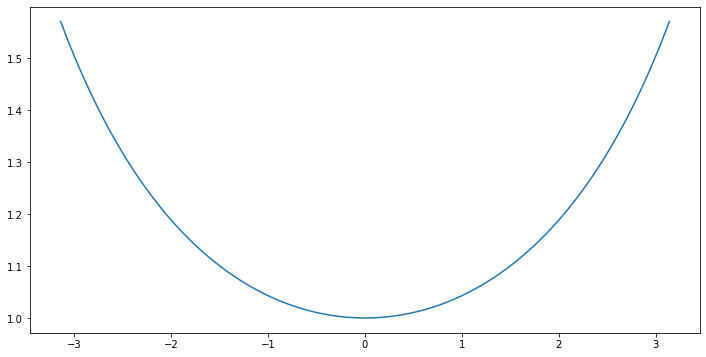

In [64]:
# insert your code here
w = np.linspace(-np.pi, np.pi, 2001)
Hsh = np.sinc(w / (2 * np.pi))
plt.plot(w, 1 / Hsh)
plt.show()

**6. Plot the designed IIR filter magnitude response $|H_{\theta^∗} (e^{j\omega})|$ on the interval `[-np.pi, np.pi]`.**

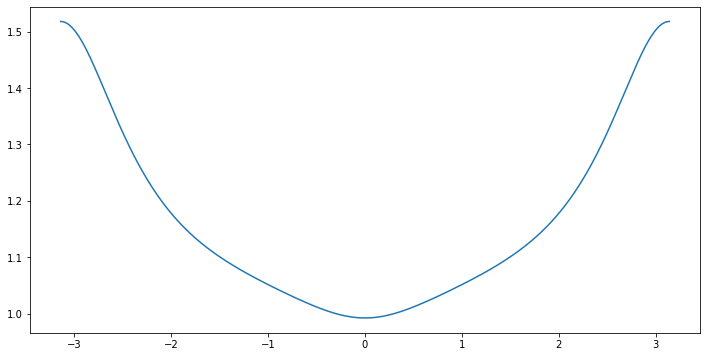

In [65]:
# insert your code here
H = prefilter(w, theta)
plt.plot(w, np.abs(H))
plt.show()

**7. Plot the error in decibels, from equation (8) on the interval `[-np.pi, np.pi]`.**

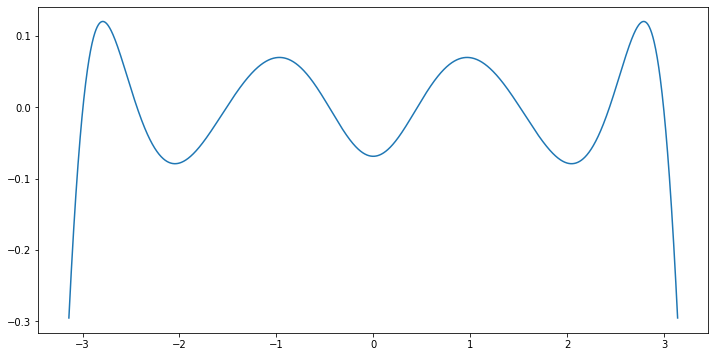

In [66]:
# insert your code here
err = 20 * np.log10(Hsh * np.abs(H))
plt.plot(w, err)
plt.show()

**8. By looking at the error plot, indicate the frequency ranges where the approximation error is high.**

insert your answer here

<h2 style="color:salmon;"><left>References</left></h2>

[1] J. G. Proakis, D. G. Manolakis, Digital Signal Processing, 3rd ed., Prentice-Hall, 1996